# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import models
from tensorflow.keras import layers

1.Load Data

In [35]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Q2Assignments/ionosphere_data.csv')

In [37]:
df.tail()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g
350,1,0,0.84710,0.13533,0.73638,-0.06151,0.87873,0.08260,0.88928,-0.09139,0.78735,0.06678,0.80668,-0.00351,0.79262,-0.01054,0.85764,-0.04569,0.87170,-0.03515,0.81722,-0.09490,0.71002,0.04394,0.86467,-0.15114,0.81147,-0.04822,0.78207,-0.00703,0.75747,-0.06678,0.85764,-0.06151,g


In [38]:
df.info

<bound method DataFrame.info of      feature1  feature2  feature3  ...  feature33  feature34  label
0           1         0   0.99539  ...    0.18641   -0.45300      g
1           1         0   1.00000  ...   -0.13738   -0.02447      b
2           1         0   1.00000  ...    0.56045   -0.38238      g
3           1         0   1.00000  ...   -0.32382    1.00000      b
4           1         0   1.00000  ...   -0.04608   -0.65697      g
..        ...       ...       ...  ...        ...        ...    ...
346         1         0   0.83508  ...    0.90546   -0.04307      g
347         1         0   0.95113  ...    0.91483    0.04712      g
348         1         0   0.94701  ...    0.92697   -0.00577      g
349         1         0   0.90608  ...    0.87403   -0.16243      g
350         1         0   0.84710  ...    0.85764   -0.06151      g

[351 rows x 35 columns]>

In [39]:
df.describe

<bound method NDFrame.describe of      feature1  feature2  feature3  ...  feature33  feature34  label
0           1         0   0.99539  ...    0.18641   -0.45300      g
1           1         0   1.00000  ...   -0.13738   -0.02447      b
2           1         0   1.00000  ...    0.56045   -0.38238      g
3           1         0   1.00000  ...   -0.32382    1.00000      b
4           1         0   1.00000  ...   -0.04608   -0.65697      g
..        ...       ...       ...  ...        ...        ...    ...
346         1         0   0.83508  ...    0.90546   -0.04307      g
347         1         0   0.95113  ...    0.91483    0.04712      g
348         1         0   0.94701  ...    0.92697   -0.00577      g
349         1         0   0.90608  ...    0.87403   -0.16243      g
350         1         0   0.84710  ...    0.85764   -0.06151      g

[351 rows x 35 columns]>

2.Checking missing data

In [40]:
df.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [ ]:
#There is no missing data in the entire dataset.

4.Encoding, Splitting and shuffling

In [46]:
df['label'] = df['label'].replace(['b','g'],[0,1])

In [48]:
good=df[df["label"]==1]
bad=df[df["label"]==0]

In [49]:
data=df.iloc[:,:-1]
labels=df["label"]

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
train_data, test_data, train_labels, test_labels = train_test_split(data,labels, test_size = 0.4) #backspace, default shuffle

In [52]:
train_data.shape

(210, 34)

In [53]:
test_data.shape

(141, 34)

In [54]:
train_labels.shape

(210,)

In [55]:
test_labels.shape

(141,)

3.Standardized the Input Variables.

In [56]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

5.Model

In [61]:
from tensorflow.keras import models
from tensorflow.keras import layers
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(train_data.shape[1],)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

6.Compilation

In [62]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

7.Train the Model with Epochs (100)

In [73]:
history=model.fit(train_data,train_labels,epochs=100,validation_split=.2)

Epoch 1/100
6/6 [==============================] - 0s 37ms/step - loss: nan - accuracy: 0.3690 - val_loss: nan - val_accuracy: 0.2143
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: nan - accuracy: 0.3690 - val_loss: nan - val_accuracy: 0.2143
Epoch 3/100
6/6 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.3690 - val_loss: nan - val_accuracy: 0.2143
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.3690 - val_loss: nan - val_accuracy: 0.2143
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: nan - accuracy: 0.3690 - val_loss: nan - val_accuracy: 0.2143
Epoch 6/100
6/6 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.3690 - val_loss: nan - val_accuracy: 0.2143
Epoch 7/100
6/6 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.3690 - val_loss: nan - val_accuracy: 0.2143
Epoch 8/100
6/6 [==============================] - 0s 12ms/ste

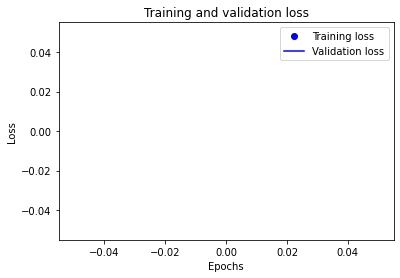

In [74]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = np.arange(1, len(history_dict["accuracy"]) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') #“bo” is for “blue dot.”
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') #“b” is for “solid blue line.”
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

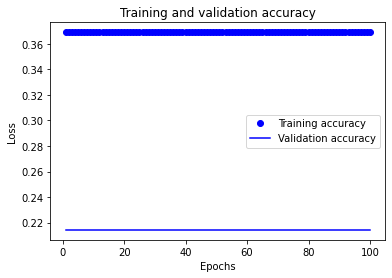

In [75]:
plt.clf() #Clears the figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict["accuracy"], 'bo', label='Training accuracy')
plt.plot(epochs, history_dict["val_accuracy"], 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

9.Prediction

In [76]:
x=model.predict(train_data).astype(dtype="u8")
x

array([[9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [92

8.Tuning & 10.Evaluation

In [77]:
model=models.Sequential()
model.add(layers.Dense(20,activation='relu',input_shape=(train_data.shape[1],)))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(6,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
model.fit(train_data,train_labels,epochs=100)

Epoch 1/100
7/7 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.3320
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.3615
Epoch 3/100
7/7 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.3840
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.3104
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.3544
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.3741
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.3365
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.3617
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.3462
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.3316
Epoch 11/100
7/7 [==============================] - 0s 4ms/

In [78]:
results=model.evaluate(test_data,test_labels)
results

5/5 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.3901


[nan, 0.39007091522216797]

11.Prediction

In [79]:
x=model.predict(test_data).astype(dtype="u8")
x

array([[9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [9223372036854775808],
       [92

Accuracy 67%